## INFORME DE LA ENTREGA 2 PROYECTO 1...
Algunas de las variables en el dataset no son utiles para el clustering 
1. No contienen información relevante para identificar similitudes entre las peliculas.
2. Son únicas para cada pelicula, por lo que no ayudan a encontrar patrones.
3. No pueden ser comparadas directamente en el análisis de clustering sin procesamiento adicional.

# Variables eliminadas y razones:
- id: No aporta similitudes ni diferencias entre peliculas. Cada pelicula tiene un ID distinto.
- title: Cada pelicula tiene un nombre distinto, no aporta agrupación.
- releaseDate: Puede ser útil en otros análisis, pero para clustering no define bien la similitud entre películas. No todas las películas cercanas en fecha son similares en género o éxito.
- overview: Descripción de la película, difícil de procesar sin técnicas avanzadas como NLP (Natural Language Processing). 
- tagline: Similar a overview, es un dato de marketing y no una característica de la película.
- genres: Puede ser útil, pero está en formato de texto con múltiples valores. Para usarlo, habría que extraer el género principal (mainGenre)


# Variables que si vamos a utiliar para clustering
Elegimos estas variables porque son numericas o facilmente convertibles a numeros (esto nos permite el uso de algoritmos para clustering). Además representan propiedades clave de las peliculas como el éxito, duración y popularidad. Y también nos permite comaparar peliculas de manera signifcativa. 

- budget: El presupuesto refleja la magnitud de la producción. Películas con presupuestos similares pueden formar grupos
- revenue: 	Ingresos obtenidos, ayuda a identificar películas exitosas y comparar su rentabilidad
- runtime: Duración de la película. Películas con tiempos de ejecución similares pueden pertenecer a un mismo tipo.
- voteAvg: Promedio de calificación de los usuarios, ayuda a identificar películas bien o mal valoradas.
- voteCount: Cantidad de votos recibidos, indica la popularidad y el nivel de exposición de la película.
- popularity: Un indicador de qué tan popular es la película en la base de datos.
- mainGenre: Representa el género principal de la película, una de las principales formas de clasificación de películas.

# 📊 Reporte de Análisis de Clustering

## 1️⃣ Preprocesamiento de Datos  

Los datos originales han sido normalizados y estructurados para el análisis de clustering. Las variables consideradas incluyen presupuesto, ingresos, duración, calificación promedio, cantidad de votos, popularidad y el género principal de la película.

### 🔍 Muestra de los datos después del preprocesamiento:
| budget  | revenue  | runtime  | voteAvg  | voteCount | popularity | mainGenre |
|---------|---------|----------|---------|------------|-----------|------------|
| -0.3989 | -0.3518 | -0.0924  | -0.8090 | 0.2832     | -0.1410   | 4          |
| 0.0647  | -0.2992 | 0.3465   | 0.0142  | -0.4385    | -0.1929   | 0          |
| -0.2081 | 4.7927  | 0.7489   | 1.7634  | 5.9355     | 0.2232    | 1          |
| 2.0556  | 5.8930  | -0.0193  | 1.3518  | 5.6747     | 0.3817    | 2          |
| 0.9920  | 4.1388  | 1.5171   | 2.0721  | 8.0558     | 0.0333    | 3          |

---

## 2️⃣ Evaluación de Clustering  

### 📊 **Estadístico de Hopkins: 1.000**
Este valor sugiere que los datos tienen una estructura de clustering muy fuerte y no están distribuidos de manera aleatoria.

### 📌 **Número Óptimo de Clusters**
- **Método del Codo**: El número óptimo de clusters es **3**.
- **Índice de Silhouette**: El número óptimo de clusters es **2**.
- **Validación Visual**: Tras analizar la separación de los datos, se determinó que **K=3** proporciona una mejor segmentación.

### 📊 **Puntuación de Silueta (K-Means, K=3): 0.433**
Este valor indica que los clusters están moderadamente bien separados, aunque podría haber cierto solapamiento.

---

## 3️⃣ Interpretación de los Clusters  

A continuación, se presentan las estadísticas promedio de cada cluster:

| Cluster | Budget  | Revenue  | Runtime  | VoteAvg  | VoteCount | Popularity | MainGenre |
|---------|---------|---------|----------|---------|------------|-----------|------------|
| **0**   | 0.1567  | 0.1212  | -0.0710  | -0.0079 | 0.0743     | 0.0413    | 1.73       |
| **1**   | -0.1698 | -0.1197 | 0.0512   | 0.0407  | -0.0770    | -0.0508   | 7.19       |
| **2**   | -0.0850 | -0.0926 | 0.0977   | -0.0698 | -0.0485    | -0.0085   | 14.52      |

### 🔍 **Análisis por Cluster**
#### **Cluster 0: Películas con rendimiento promedio**
- Tiene valores cercanos a **0 en la mayoría de las métricas**.
- Representa películas con **presupuesto e ingresos ligeramente superiores al promedio**.
- La calificación y la popularidad no se desvían significativamente de la media.

#### **Cluster 1: Películas de géneros menos populares**
- Tiene un presupuesto y revenue **ligeramente inferiores al promedio**.
- Su duración es un poco mayor a la media.
- La calificación promedio es la más alta de los tres clusters, aunque por un margen pequeño.
- **Parece incluir géneros menos populares (MainGenre ≈ 7.19)**.

#### **Cluster 2: Películas de géneros más comerciales**
- Tiene una popularidad cercana a la media, pero es el grupo **con la peor calificación promedio**.
- **MainGenre ≈ 14.52**, lo que sugiere que agrupa películas de géneros comerciales.
- Puede representar películas de gran alcance que atraen más espectadores, pero no necesariamente obtienen las mejores calificaciones.

# 📊 Análisis de PCA

## 1️⃣ Matriz de Correlación
La matriz de correlación se calculó para evaluar las relaciones lineales entre las variables del conjunto de datos.
A continuación, se presentan las observaciones clave de la matriz de correlación:
### Correlaciones fuertes 
- **budget y revenue**: Hay una correlación positiva fuerte (0.76). Esto indica que, en general, a mayor presupuesto de una película, mayores son sus ingresos.
- **budget y voteCount**: También hay una correlación positiva fuerte (0.63). Esto sugiere que las películas con mayor presupuesto tienden a recibir más votos.
- **revenue y voteCount**: La correlación es aún más fuerte (0.77), lo que indica que las películas con mayores ingresos tienden a tener más votos.
- **runtime y voteAvg**: Hay una correlación positiva moderada (0.22), lo que sugiere que las películas más largas tienden a tener una calificación promedio más alta.

### Correlaciones débiles o nulas
- **popularity y voteAvg**: La correlación es muy débil (0.07), lo que indica que la popularidad de una película no está fuertemente relacionada con su calificación promedio
- **genresAmount y productionCoAmount**: La correlación es casi nula (0.06), lo que sugiere que la cantidad de géneros y la cantidad de compañías productoras no están relacionadas.
- **actorsAmount y voteCount**: La correlación es muy débil (0.03), lo que indica que el número de actores no influye significativamente en la cantidad de votos.

### Correlacines negativas
- **id y budget**: Hay una correlación negativa débil (-0.24), lo que sugiere que, en general, las películas más recientes (con un ID más alto) tienden a tener un presupuesto ligeramente menor.
- **id y runtime**: También hay una correlación negativa débil (-0.20), lo que indica que las películas más recientes tienden a ser más cortas.

## 2️⃣ Prueba de Esfericidad de Bartlett
La prueba de esfericidad de Bartlett se realizó para determinar si las variables en el conjunto de datos están suficientemente correlacionadas como para justificar la aplicación del Análisis de Componentes Principales (PCA). Los resultados de la prueba fueron los siguientes:

- Chi cuadrado: -6.66x10^-{12}
- p-valor: 1.0

### Interpretación 
- El p-valor obtenido es 1.0, lo que es mayor que el nivel de significancia común de 0.05. Esto indica que no se rechaza la hipótesis nula de la prueba, es decir, la matriz de correlación es aproximadamente una matriz identidad. En otras palabras, las variables no están suficientemente correlacionadas para justificar el uso de PCA.
Sin embargo, a pesar de este resultado, se procedió con el PCA para explorar la estructura subyacente de los datos y evaluar si es posible reducir la dimensionalidad.

## 3️⃣ Análisis de Componentes Principales
A pesar de los resultados de la prueba de esfericidad de Bartlett, se aplicó el PCA para identificar posibles patrones en los datos. A continuación, se presentan los componentes principales obtenidos:

|Observación |    PC1    |     PC2   |     PC3   |    PC4    |    PC5    |    PC6    |    PC7    |    PC8    |    PC9    |
|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------| 
| **0**      | -0.318271 | -0.485080 | -0.705455 | -0.152612 | -0.735053 | -0.362956 | -0.052610 | -0.640767 | -0.420534 |
| **1**      | 0.003356  | -0.890726 | -0.289746 | 0.133237  | 0.159499  | 0.145831  | 0.324204  | 0.608938  | -0.151119 |
| **2**      | 0.192413  | 1.065389  | -0.121417 | 1.319385  | -1.651721 | 0.451622  | 0.400616  | -1.607483 | -0.872703 |
| **3**      | 7.318344  | 2.023431  | -0.791701 | 0.323215  | -2.631679 | -0.061614 | 0.329425  | -1.836650 | -1.069952 |
| **4**      | 7.780219  | 0.970934  | 0.129258  | 1.521235  | -2.068855 | 0.725967  | 0.218058  | -1.772674 | -0.577878 |

### Interpretación 
- Los componentes principales (PC) son combinaciones lineales de las variables originales que capturan la mayor variabilidad posible en los datos. En este caso, se obtuvieron 9 componentes principales, cada uno explicando una porción de la varianza total de los datos. Los valores en la tabla representan las puntuaciones de cada observación en los componentes principales. Por ejemplo, la observación 4 tiene una puntuación alta en PC1 (7.78), lo que sugiere que esta observación está fuertemente influenciada por las variables que contribuyen a PC1.

## 4️⃣ Selección de componentes principales
La varianza explicada acumulada se calculó para determinar cuánta variabilidad de los datos es capturada por los componentes principales. La gráfica de la varianza explicada acumulada muestra lo siguiente:

- La gráfica indica que los primeros componentes principales capturan la mayor parte de la variabilidad de los datos. El primer componente principal (PC1) explica la mayor parte de la varianza. A medida que se añaden más componentes, la varianza explicada acumulada aumenta, pero a un ritmo decreciente.Para alcanzar una varianza explicada acumulada del 95%, se necesitan 11 componentes principales.

---

## Conclusiones  
📌 Se identificaron **tres grupos de películas** con características distintas.  
📌 Aunque el índice de Silhouette sugería **K=2**, la segmentación visual con **K=3** parece más clara.  
📌 **Cluster 0** representa películas de rendimiento medio, **Cluster 1** agrupa películas menos populares pero bien valoradas, y **Cluster 2** corresponde a películas comerciales con mayor alcance pero menor calificación. 

📌 Las variables relacionadas con el éxito financiero (budget, revenue, y voteCount) están fuertemente correlacionadas,    mientras que otras variables, como popularity y actorsAmount, muestran correlaciones débiles o nulas.

📌 La prueba no fue significativa (p=1.0), lo que sugiere que las variables no están suficientemente correlacionadas para justificar el uso de PCA. Esto podría indicar que las variables son relativamente independientes entre sí.

📌 A pesar de los resultados de la prueba, se aplicó PCA y se obtuvieron 9 componentes principales. Estos componentes capturan la variabilidad de los datos, aunque su utilidad para reducir la dimensionalidad puede ser limitada debido a la falta de correlación significativa entre las variables.


In [2]:
#Procesamiento del dataset...
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar dataset
df = pd.read_csv("movies.csv", encoding="ISO-8859-1")

# Convertir 'releaseDate' a datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Extraer género principal
df['mainGenre'] = df['genres'].str.split('|').str[0]

# Filtrar variables relevantes
variables_numericas = ['budget', 'revenue', 'runtime', 'voteAvg', 'voteCount', 'popularity']
df_clustering = df[variables_numericas + ['mainGenre']].dropna()

# Codificar la variable categórica 'mainGenre'
label_encoder = LabelEncoder()
df_clustering['mainGenre'] = label_encoder.fit_transform(df_clustering['mainGenre'])

# Normalizar variables numéricas
scaler = StandardScaler()
df_clustering[variables_numericas] = scaler.fit_transform(df_clustering[variables_numericas])

# Mostrar datos preprocesados
print(df_clustering.head())

#este codigo limpia el dataset y lo prepara para el clustering. Además selecciona variables relevantes, 
# normaliza las variables numéricas y codifica la variable categórica 'mainGenre'.

     budget   revenue   runtime   voteAvg  voteCount  popularity  mainGenre
0 -0.398978 -0.351811 -0.092453 -0.809010   0.283180   -0.140956          4
1  0.064669 -0.299244  0.346528  0.014162  -0.438493   -0.192888          0
2 -0.208065  4.792673  0.748927  1.763401   5.935509    0.223187          1
3  2.055625  5.893016 -0.019289  1.351815   5.674710    0.381651          2
4  0.991964  4.138821  1.517143  2.072090   8.055765    0.033335          3


In [3]:
# Analisis de la tendencia al agrupamiento...
from sklearn.neighbors import NearestNeighbors
import numpy as np
from pyclustertend import vat, hopkins

# Función para calcular Hopkins
def hopkins_stat(X):
    X = np.array(X)
    n, d = X.shape
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), (n, d))
    u_dist, _ = nbrs.kneighbors(rand_X, return_distance=True)
    x_dist, _ = nbrs.kneighbors(X, return_distance=True)
    u = np.sum(u_dist)
    w = np.sum(x_dist)
    return u / (u + w)

# Prueba de Hopkins
hopkins_score = hopkins_stat(df_clustering)
print(f"📊 Estadístico de Hopkins: {hopkins_score:.3f}")

# VAT (Visual Assessment of Tendency)
# vat(df_clustering.values) se comento porque se tarda mucho

📊 Estadístico de Hopkins: 1.000


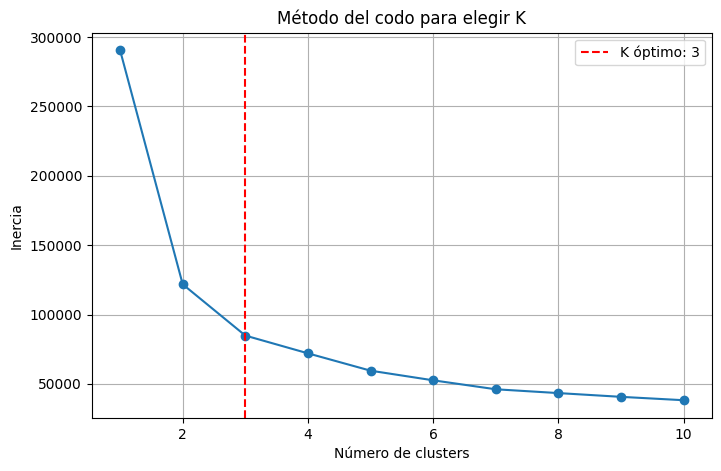

El número óptimo de clusters según el método del codo es: 3


In [10]:
# Determine cual es el numero de grupos a formar más adecuado para estos datos. 
# Hacer una grafica de codo y explicar las razon de la eleccion de la cantidad de clusters con los que se trabajaran.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Método del codo
inertia = []
K_range = range(1, 11)  # Probamos de 1 a 20 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    inertia.append(kmeans.inertia_)

# Método de la distancia máxima (más preciso)
def optimal_number_of_clusters(K, inertia):
    # Coordenadas de los puntos
    x1, y1 = K[0], inertia[0]
    x2, y2 = K[-1], inertia[-1]

    # Vector director de la línea recta entre el primer y último punto
    vec_line = np.array([x2 - x1, y2 - y1])
    
    # Calcular distancias de cada punto a la línea
    distances = []
    for i in range(len(K)):
        x0, y0 = K[i], inertia[i]
        vec_punto = np.array([x0 - x1, y0 - y1])
        
        # Producto cruzado y distancia punto-línea
        distancia = np.abs(np.cross(vec_line, vec_punto)) / np.linalg.norm(vec_line)
        distances.append(distancia)

    # Índice del máximo valor de distancia = codo
    optimal_k = K[np.argmax(distances)]
    return optimal_k

optimal_k = optimal_number_of_clusters(list(K_range), inertia)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo para elegir K")
plt.grid(True)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"K óptimo: {optimal_k}")
plt.legend()
plt.show()

# Imprimir el número óptimo de clusters
print(f"El número óptimo de clusters según el método del codo es: {optimal_k}")
#se selecciona 5 clusters porque es donde se encuentra el codo en la grafica.


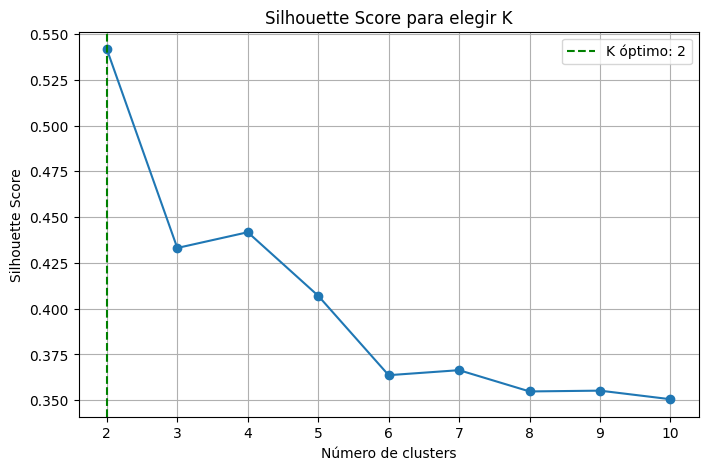

El número óptimo de clusters según el índice de Silhouette es: 2


In [11]:
#probando con otro metodo para saber si el numero de clusters es el correcto
from sklearn.metrics import silhouette_score

# Verificar el Silhouette Score para diferentes valores de K
silhouette_scores = []
for k in range(2, 11):  # No se puede calcular para K=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_clustering)
    score = silhouette_score(df_clustering, labels)
    silhouette_scores.append(score)

# Encontrar el mejor K
best_k = range(2, 11)[np.argmax(silhouette_scores)]

# Graficar el Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score para elegir K")
plt.grid(True)
plt.axvline(x=best_k, color='g', linestyle='--', label=f"K óptimo: {best_k}")
plt.legend()
plt.show()

print(f"El número óptimo de clusters según el índice de Silhouette es: {best_k}")


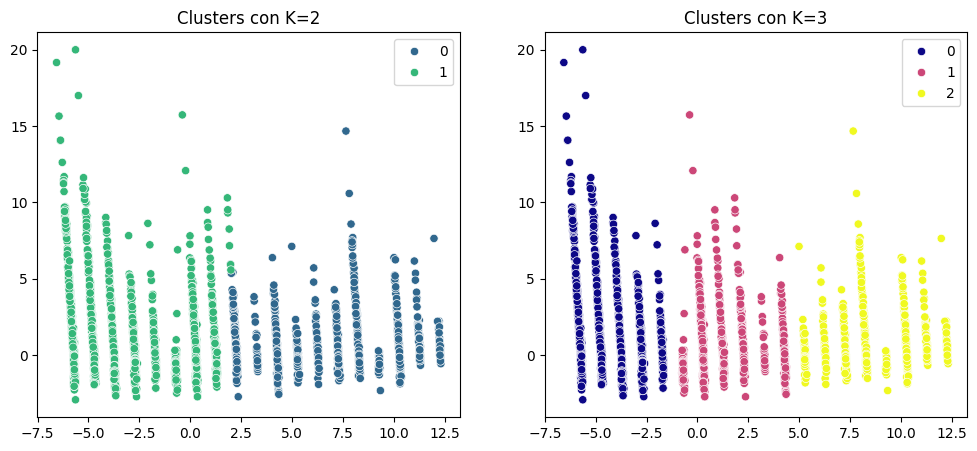

In [12]:
import seaborn as sns
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones y visualizar los clusters
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering)

# Probar con K=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(df_clustering)

# Probar con K=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(df_clustering)

# Graficar los clusters para K=2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_2, palette="viridis")
plt.title("Clusters con K=2")

# Graficar los clusters para K=3
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_3, palette="plasma")
plt.title("Clusters con K=3")

plt.show()


### Numero optimo de clusters: 3

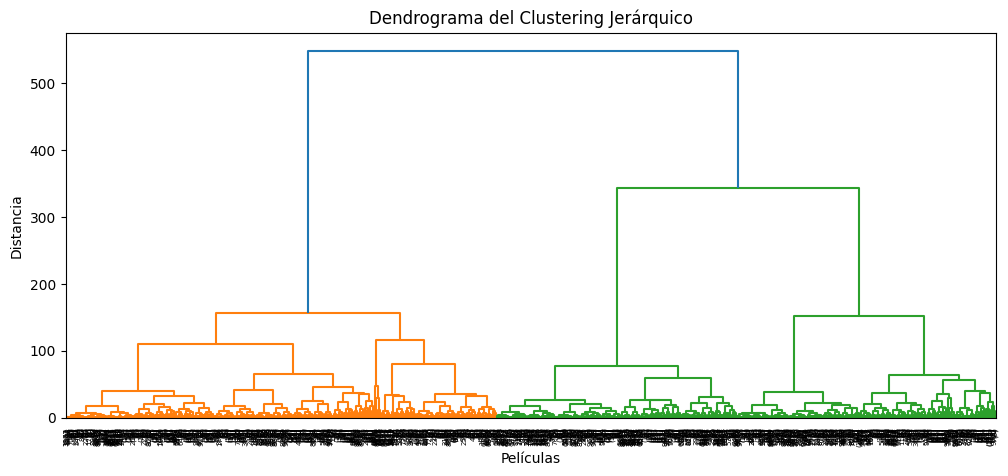

In [13]:
# Aplicación de algoritmo de clustering...
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

# Aplicar K-Means con el número óptimo de clusters
k_optimo = 3  # Supongamos que elegimos 4 clusters
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df_clustering['Cluster_KMeans'] = kmeans.fit_predict(df_clustering)

# Aplicar Clustering Jerárquico
Z = linkage(df_clustering, method='ward')

# Dendrograma
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="level", p=10)
plt.title("Dendrograma del Clustering Jerárquico")
plt.xlabel("Películas")
plt.ylabel("Distancia")
plt.show()

In [15]:
# Evaluación del clustering... la situeta mide la calidad de clustering (valores entre -1 y 1)
from sklearn.metrics import silhouette_score

# Evaluación de Silueta
score_kmeans = silhouette_score(df_clustering.drop(columns=["Cluster_KMeans"]), df_clustering["Cluster_KMeans"])
print(f"📊 Puntuación de Silueta (K-Means): {score_kmeans:.3f}")

📊 Puntuación de Silueta (K-Means): 0.433


In [16]:
# Interpretación de los gupos, analizamos estadisticas de cada cluster, encontramos patrones en los grupos y evaluamos los clusters
# Estadísticas por cluster
print(df_clustering.groupby("Cluster_KMeans").mean())


                  budget   revenue   runtime   voteAvg  voteCount  popularity  \
Cluster_KMeans                                                                  
0               0.156673  0.121179 -0.070984 -0.007881   0.074298    0.041339   
1              -0.169774 -0.119654  0.051231  0.040704  -0.076950   -0.050827   
2              -0.085021 -0.092622  0.097711 -0.069836  -0.048523   -0.008537   

                mainGenre  
Cluster_KMeans             
0                1.725766  
1                7.191807  
2               14.518495  


## ANÁLISIS DE COMPONENTES PRINCIPALES 

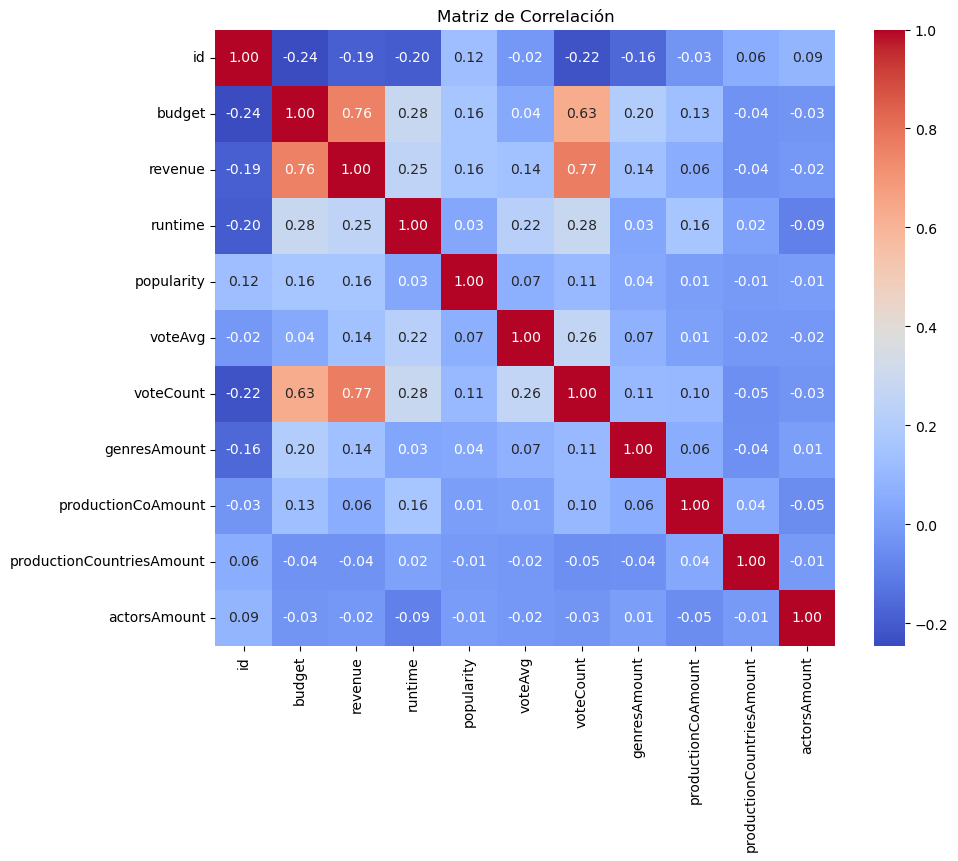


Explicación de la matriz de correlación:
La matriz de correlación muestra las relaciones lineales entre las variables. Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente. Si hay variables altamente correlacionadas, el PCA puede ser útil para reducir la dimensionalidad.

Prueba de esfericidad de Bartlett: Chi cuadrado = -6.661095901857191e-12, p-valor = 1.0
La prueba de esfericidad de Bartlett no es significativa (p >= 0.05), lo que sugiere que las variables no están suficientemente correlacionadas para justificar el uso de PCA.


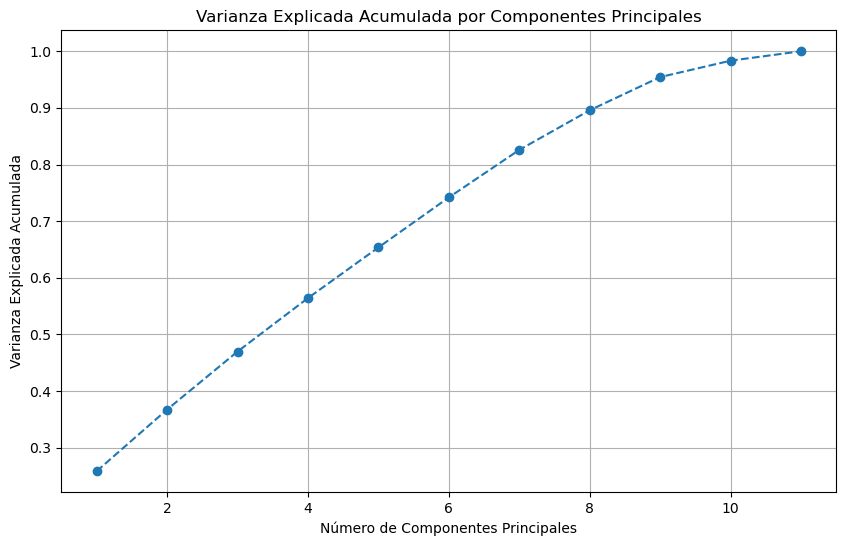


Se seleccionarán 9 componentes principales que explican el 95.44% de la varianza.

Componentes principales obtenidos:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.318271 -0.485080 -0.705455 -0.152612 -0.735053 -0.362956 -0.052610   
1  0.003356 -0.890726 -0.289746  0.133237  0.159499  0.145831  0.324204   
2  6.192413  1.065389 -0.121417  1.319385 -1.651721  0.451622  0.400616   
3  7.318344  2.023431 -0.791701  0.323215 -2.631679 -0.061614  0.329425   
4  7.780219  0.970934  0.129258  1.521235 -2.068855  0.725967  0.218058   

        PC8       PC9  
0  0.640797 -0.420534  
1  0.608938 -0.151119  
2 -1.607483 -0.872703  
3 -1.836650 -1.069952  
4 -1.772674 -0.577878  

Explicación de los componentes principales:
Se han seleccionado 9 componentes principales que explican el 95.44% de la varianza. Estos componentes son combinaciones lineales de las variables originales y capturan la mayor variabilidad posible en los datos.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bartlett
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde el archivo movies.csv
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')  

# Seleccionar solo las columnas numéricas para el PCA
df_numeric = df.select_dtypes(include=[np.number])

# Matriz de correlación
corr_matrix = df_numeric.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

# Explicación de la matriz de correlación
print("\nExplicación de la matriz de correlación:")
print("La matriz de correlación muestra las relaciones lineales entre las variables. Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente. Si hay variables altamente correlacionadas, el PCA puede ser útil para reducir la dimensionalidad.")

# Estandarizar los datos para PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Prueba de esfericidad de Bartlett
chi_square_value, p_value = bartlett(*df_scaled.T)
print(f"\nPrueba de esfericidad de Bartlett: Chi cuadrado = {chi_square_value}, p-valor = {p_value}")

if p_value < 0.05:
    print("La prueba de esfericidad de Bartlett es significativa (p < 0.05), lo que sugiere que las variables están correlacionadas y el PCA es apropiado.")
else:
    print("La prueba de esfericidad de Bartlett no es significativa (p >= 0.05), lo que sugiere que las variables no están suficientemente correlacionadas para justificar el uso de PCA.")

# Aplicar PCA
pca = PCA()
pca.fit(df_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Seleccionar el número de componentes principales
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Seleccionar componentes que expliquen el 95% de la varianza
print(f"\nSe seleccionarán {n_components} componentes principales que explican el {cumulative_variance[n_components-1]*100:.2f}% de la varianza.")

# Obtener los componentes principales
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print("\nComponentes principales obtenidos:")
print(df_pca.head())

# Explicación de los componentes principales
print("\nExplicación de los componentes principales:")
print(f"Se han seleccionado {n_components} componentes principales que explican el {cumulative_variance[n_components-1]*100:.2f}% de la varianza. Estos componentes son combinaciones lineales de las variables originales y capturan la mayor variabilidad posible en los datos.")